# SR results

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import re
from numba import jit

%matplotlib notebook


def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False


def read_file(file_path):

    # Read the input file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Extract headers
    headers  = []
    num_pars = []
    for line in lines:
        if line.startswith("#"):
            name, value = re.split(r'\s*:\s*', line[2:].strip())
            headers.append(name)
            num_pars.append(int(value))

    return headers, np.array(num_pars)



def read_complex_energy_file(filepath):
    """
    Reads a file with complex numbers in the format (real,imag).
    
    Parameters:
    - filepath: Path to the file containing complex numbers.
    
    Returns:
    - real_part: numpy array of the real parts.
    - imag_part: numpy array of the imaginary parts.
    """
    real_part = []
    imag_part = []

    with open(filepath, 'r') as file:
        for line in file:
            # Remove parentheses and split by comma
            line = line.strip().strip('()')
            real, imag = map(float, line.split(','))
            real_part.append(real)
            imag_part.append(imag)

    return np.array(real_part), np.array(imag_part)



In [2]:

folder_data = './output/'

# folder_data = '../New_two_parameters_NN_f_ij_code/output/'


In [3]:

energy_SR_real, energy_SR_imag = read_complex_energy_file(folder_data + "energy_SR.dat")

params_SR = np.loadtxt(folder_data+"params_SR.dat", unpack='true')    

headers, num_pars = read_file(folder_data+"info.dat")



In [4]:
print(energy_SR_real.shape)
print(params_SR.shape)
if(params_SR.shape[0]!=np.sum(np.array(num_pars))):
    print("There is a problem with the number of parameters in "+folder_data+"params_SR.dat"+" and the one inside "+folder_data+"info.dat. The first one is "+str(params_SR.shape[0])+" while the second one is "+str(np.sum(np.array(num_pars))))


(895,)
(2048, 895)


<IPython.core.display.Javascript object>


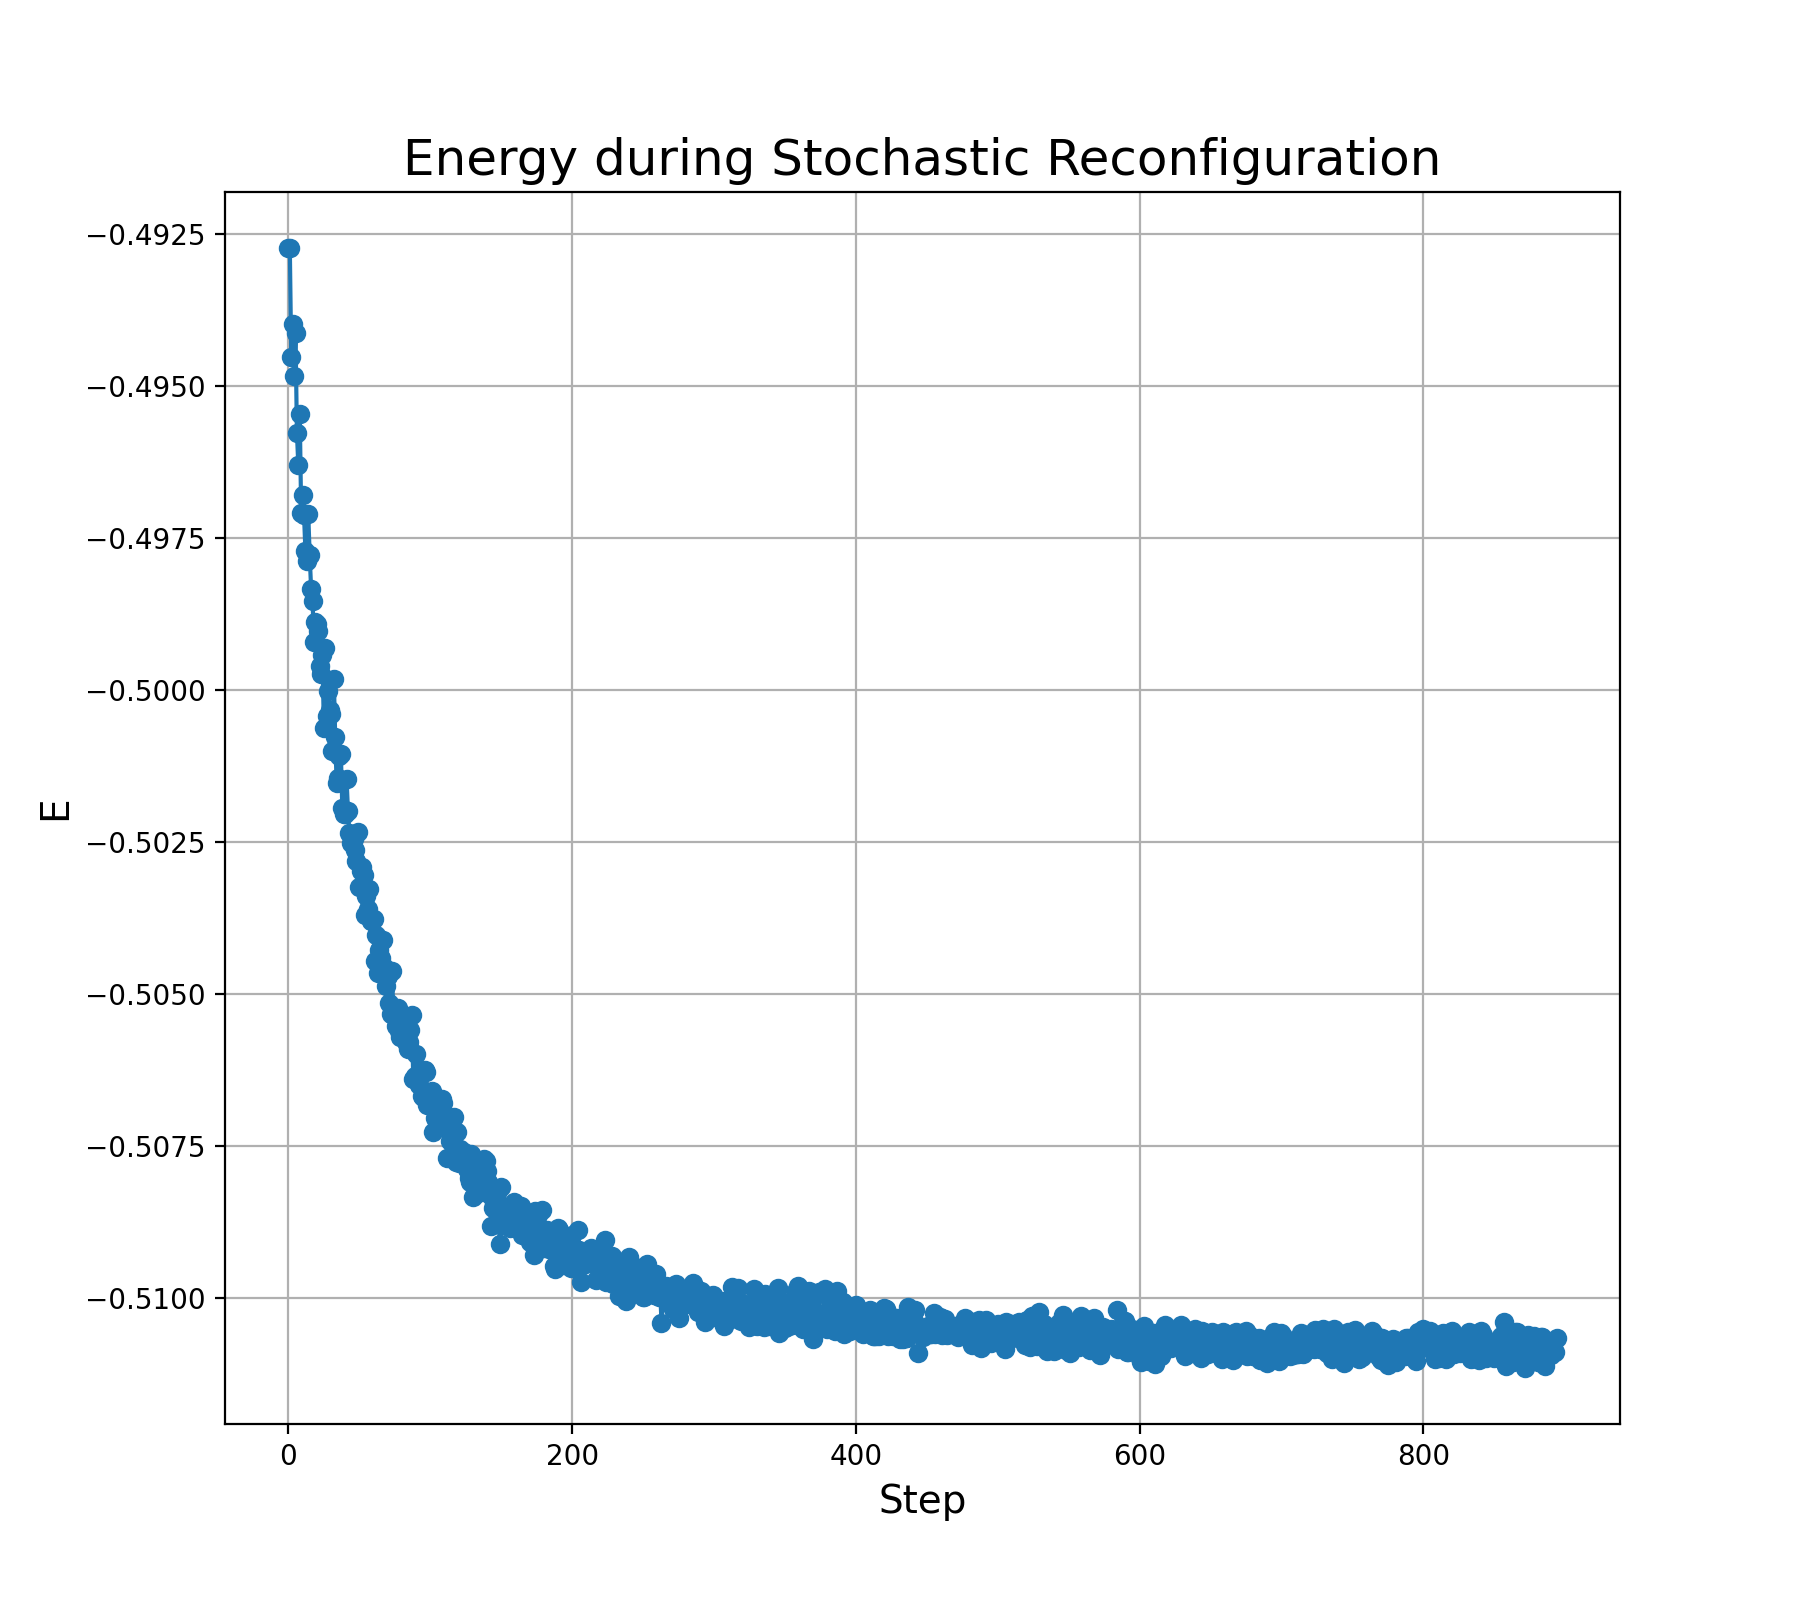

In [5]:
L = 32

fig=plt.figure(figsize=(9, 8))
plt.plot(energy_SR_real/L,marker='o')
plt.title('Energy during Stochastic Reconfiguration', fontsize=18)
plt.ticklabel_format(useOffset=False)
plt.xlabel('Step', fontsize=14)
plt.ylabel('E', fontsize=14)

# plt.set_scientific(False)
plt.grid(True)
plt.show()

In [6]:
L=32

print(np.mean(energy_SR_real[-49:])/L)
print(np.std(energy_SR_real[-49:])/L)
print("\n")
print(np.mean(energy_SR_imag[-49:])/L)
print(np.std(energy_SR_imag[-49:])/L)




-0.5108371173469387
0.00015870976191026637


-1.268106020408163e-05
9.90466520462909e-05


<IPython.core.display.Javascript object>


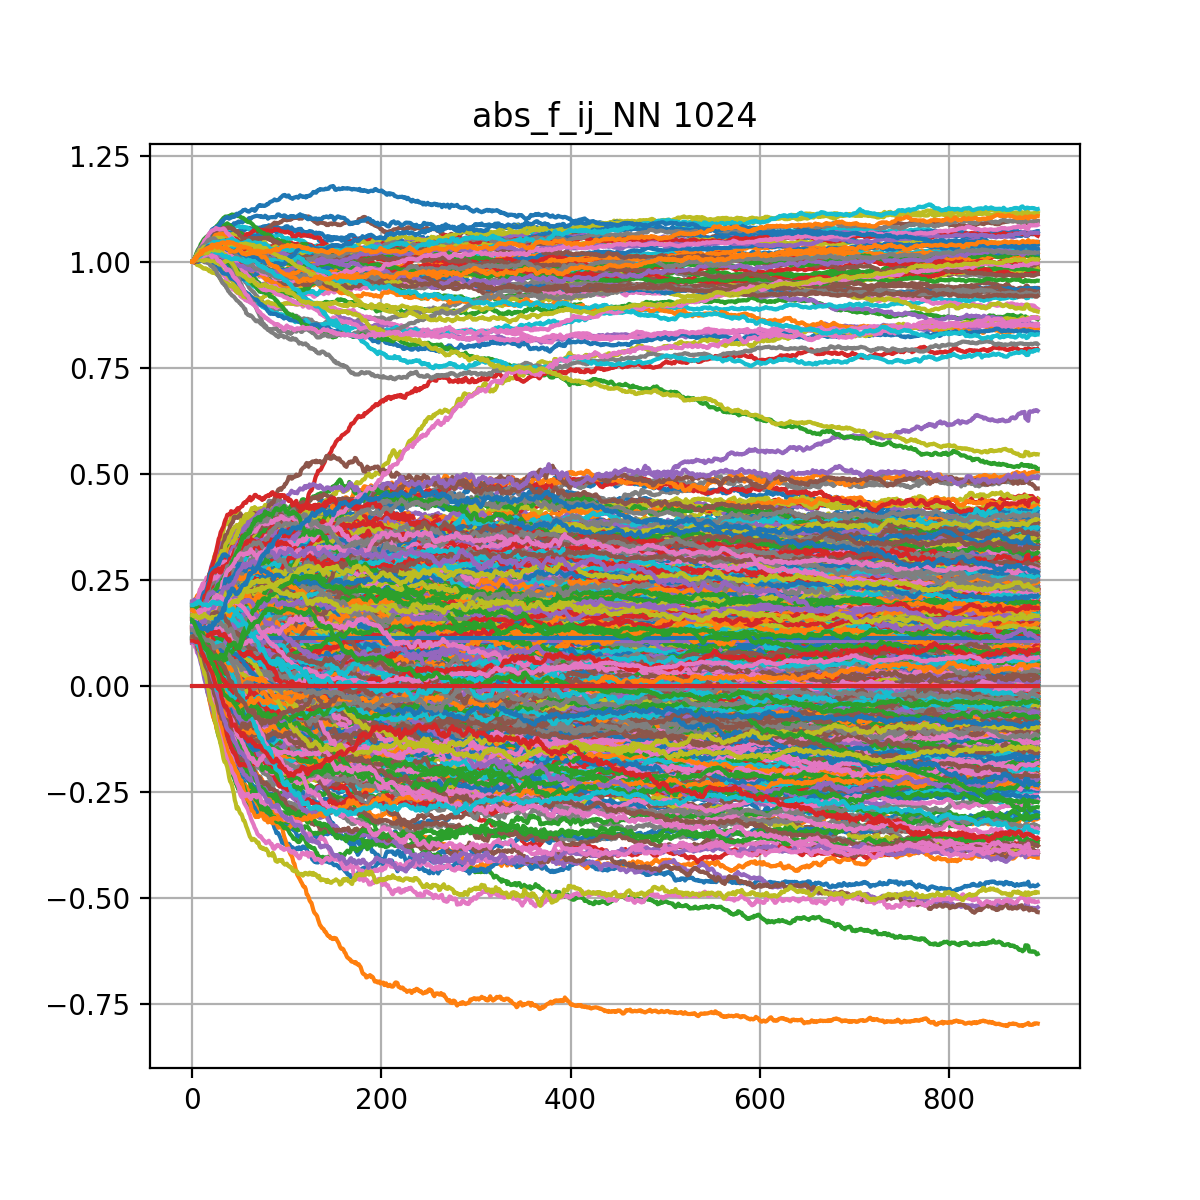

<IPython.core.display.Javascript object>


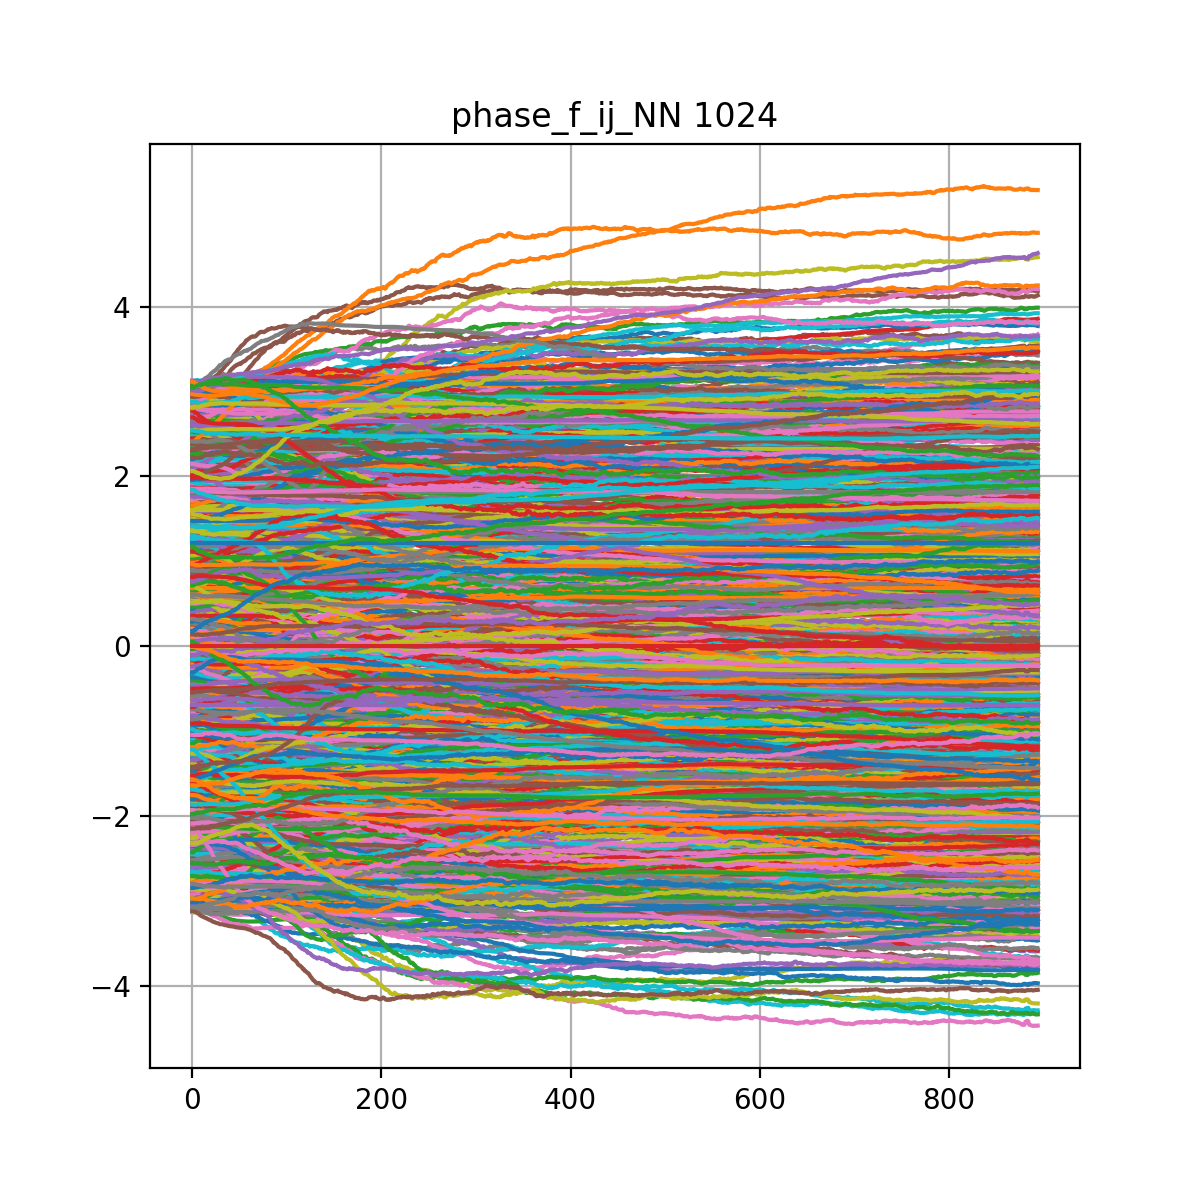

In [10]:
n_pars_to_print = num_pars.cumsum()
n_pars_to_print = np.concatenate((np.array([0]),n_pars_to_print))



for indpar, namepar in enumerate(headers):
    if num_pars[indpar]==1:
        plt.plot(np.transpose(params_SR[n_pars_to_print[indpar]:n_pars_to_print[indpar+1]]),label=namepar)
    if num_pars[indpar]>1:
        fig=plt.figure(figsize=(6, 6))
        plt.title(namepar +" "+str(num_pars[indpar]))
#         if 'phase' in namepar:
#             plt.plot(np.transpose(params_SR[n_pars_to_print[indpar]:n_pars_to_print[indpar+1]])%np.pi)
#         else:
#             plt.plot(np.transpose(params_SR[n_pars_to_print[indpar]:n_pars_to_print[indpar+1]]))
        plt.plot(np.transpose(params_SR[n_pars_to_print[indpar]:n_pars_to_print[indpar+1]]))
        plt.grid(True)
        plt.show()
        

In [11]:

n_steps_for_average_params = 37

for indpar, namepar in enumerate(headers):
    if num_pars[indpar]==1:
        print(namepar)
        print(np.mean(params_SR[n_pars_to_print[indpar]:n_pars_to_print[indpar+1],-n_steps_for_average_params:]),end='   ')
        print("\n")
    elif num_pars[indpar]>1:
        appo = []
        for i in range(n_pars_to_print[indpar],n_pars_to_print[indpar+1]):
            appo.append(np.mean(params_SR[i,-n_steps_for_average_params:]))
        print(namepar)
        for pippo in appo:
            print(pippo,end='   ')
        print("\n")
        


abs_f_ij_NN
0.16356799999999996   -0.31839640540540537   0.8700787837837838   0.24292435135135132   0.10794952432432434   0.02041255135135135   0.0915584918918919   0.254775054054054   -0.22725813513513513   -0.029361821621621615   1.0426929729729728   0.22242213513513517   0.01576607027027027   0.23956202702702703   -0.04772501621621622   0.39197289189189194   -0.11873605405405405   0.3574575675675675   -0.15650916216216215   -0.30855367567567565   -0.04008923513513514   -0.0004151958432432433   0.0674685027027027   0.1462817027027027   -0.08275762972972972   0.26905175675675674   -0.08925800540540542   0.1708326756756757   0.07566345405405406   0.20582713513513512   -0.020833532432432432   0.12040708108108107   0.32692829729729733   0.15639200000000003   0.28684264864864867   0.9865005945945945   -0.16203610810810815   -0.04181066216216216   0.29540175675675673   0.03384421891891892   -0.03829956216216217   0.02794772162162162   0.1438179189189189   -0.005681582432432433   0.23839872

-1.6057399999999995   2.5434851351351355   0.29199805405405405   -1.4899872972972972   -0.11036338918918917   1.0651394594594596   -1.235946216216216   -3.18329   1.2428097297297296   -2.29525   -1.406338108108108   -2.507176486486487   -1.24248972972973   -1.3175940540540538   2.040365945945946   4.192174324324325   -2.81449   1.3511289189189188   0.7697430000000001   0.6933237297297297   0.9107143513513515   2.045564864864865   0.2013710810810811   1.0423094594594595   -2.1147494594594587   3.6180154054054054   -1.4186375675675675   -1.4459789189189187   -2.527808918918919   2.0404748648648656   0.7237727027027027   2.05443027027027   -0.5756919459459459   -0.61102   -2.1768978378378376   0.3277123783783784   -3.332421351351351   1.7751524324324324   0.8229200810810812   1.7289318918918917   2.2758632432432435   1.5586648648648649   -2.725471081081081   1.5631851351351354   2.6476862162162162   2.467092702702703   2.504502432432432   2.166902432432432   2.0724894594594594   0.2190377